<a href="https://colab.research.google.com/github/angelohafner/primeiro-site-linguagem-programacao-1/blob/main/Newton_Raphson_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Newton-Raphson Method – Theory, Implementation, and Experiments

Este notebook foi preparado para estudo em sala (Google Colab ou Jupyter). Comentários de código estão em **inglês**. Use-o para aprender a teoria, implementar o método e explorar casos práticos.


## Objetivos
- Entender a ideia do método de Newton–Raphson para encontrar raízes de equações não lineares.
- Revisar a fórmula de iteração, condições de convergência e limitações.
- Implementar o método em Python e testar em funções propostas.
- Visualizar graficamente a função e as aproximações sucessivas até a convergência.

## Teoria resumida
Dada uma função contínua e diferenciável $f(x)$, queremos resolver $f(x)=0$.

**Ideia:** a partir de um chute inicial $x_0$, aproximamos $f$ localmente por sua reta tangente em $x_k$ e usamos a interseção da tangente com o eixo $x$ como próxima aproximação.

**Fórmula de atualização:**
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

**Convergência (intuição):** se $f$ é suficientemente suave perto da raiz $r$ e $f'(r)\neq 0$, e se o chute inicial $x_0$ está "perto o bastante" de $r$, o método converge tipicamente **quadraticamente**, ou seja, o erro tende a se reduzir rapidamente.

**Limitações e cuidados:**
- É necessário calcular a derivada $f'(x)$.
- Se $f'(x_k)$ for muito pequeno (ou zero), a iteração pode divergir ou oscilar.
- Maus chutes iniciais podem levar a divergência, ciclos ou convergência para outra raiz.
- Em funções com descontinuidades, pontos críticos múltiplos ou não diferenciáveis, o método pode falhar.

## Tarefa principal
Implemente em Python uma função `newton_raphson` que receba `f`, `df` (derivada), um palpite inicial `x0`, tolerância `tol` e `max_iter`, e retorne a raiz aproximada e o histórico das iterações.

Testaremos em:
$$ f(x) = x + e^{x} - \sin(x). $$

In [1]:
# Imports (do not use seaborn). Use only numpy and matplotlib as requested.
import numpy as np
import matplotlib.pyplot as plt

# Define the primary test function and its derivative.
def f1(x):
    # f(x) = x + exp(x) - sin(x)
    return x + np.exp(x) - np.sin(x)

def df1(x):
    # f'(x) = 1 + exp(x) - cos(x)
    return 1.0 + np.exp(x) - np.cos(x)

## Implementação do método (complete os TODOs)
Preencha os trechos marcados como `# TODO`.

**Requisitos:**
- Não use operadores compostos (evite `x += ...`).
- Guarde cada aproximação em uma lista para plotar depois.
- Pare quando `|f(x_k)| < tol` **ou** quando o incremento `|x_{k+1} - x_k| < tol`.
- Retorne `(x_root, xs)` onde `xs` é a lista com todas as aproximações.

In [2]:
def newton_raphson(f, df, x0, tol=1e-8, max_iter=100):
    """
    Newton-Raphson root-finding.
    Parameters
    ----------
    f : callable
        Function f(x).
    df : callable
        Derivative f'(x).
    x0 : float
        Initial guess.
    tol : float
        Convergence tolerance.
    max_iter : int
        Maximum number of iterations.
    Returns
    -------
    x_root : float
        Approximated root.
    xs : list of float
        Iterates history.
    """
    xs = []
    xk = float(x0)
    xs.append(xk)

    for k in range(max_iter):
        fxk = f(xk)
        dfxk = df(xk)

        # Guard against zero or tiny derivative
        if dfxk == 0.0:
            # Derivative is zero; cannot proceed.
            break

        # Newton step: x_{k+1} = x_k - f(x_k)/f'(x_k)
        step = fxk / dfxk
        x_next = xk - step

        # Save iterate
        xs.append(float(x_next))

        # Convergence checks
        if abs(f(x_next)) < tol:
            xk = x_next
            break
        if abs(x_next - xk) < tol:
            xk = x_next
            break

        # Update for next loop
        xk = x_next

    x_root = xk
    return x_root, xs

## Teste com $f(x) = x + e^x - \sin(x)$
Ajuste `x0`, `tol` e `max_iter` conforme necessário.

In [3]:
# Parameters for the test run
x0 = 0.0  # try different starting points, e.g., -1.0, 0.0, 1.0
tol = 1e-10
max_iter = 50

# Run Newton-Raphson
root, xs = newton_raphson(f1, df1, x0=x0, tol=tol, max_iter=max_iter)
root


np.float64(-1.2349822792317742)

## Gráfico da função e das aproximações
O gráfico mostra a função em uma janela ao redor das iterações e os pontos aproximados sucessivos.

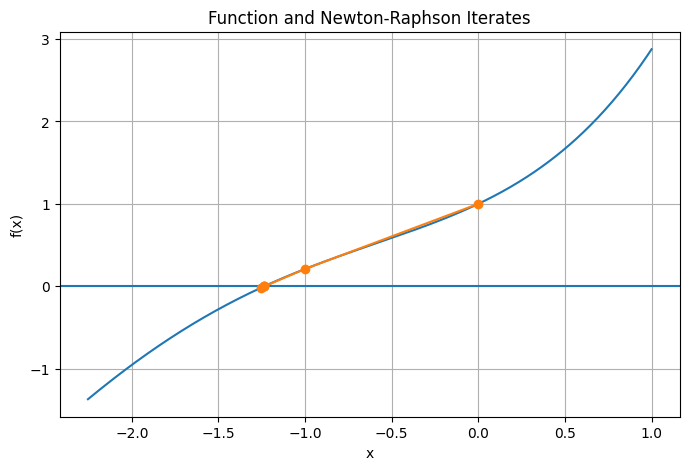

In [4]:
# Build a plotting window based on the iterates
xs_array = np.array(xs)
x_min = np.min(xs_array) - 1.0
x_max = np.max(xs_array) + 1.0

# Create grid and evaluate function
X = np.linspace(x_min, x_max, 400)
Y = f1(X)

# Plot function
plt.figure(figsize=(8, 5))
plt.axhline(0.0)
plt.plot(X, Y)

# Plot iterates as markers and connecting lines
plt.plot(xs_array, f1(xs_array), marker='o')
plt.title('Function and Newton-Raphson Iterates')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

## Funções adicionais (opcionais)
Experimente seu código com outras funções.

1. $f(x) = x^3 - 2x - 5$
2. $f(x) = \cos(x) - x$

In [5]:
def f2(x):
    # f(x) = x^3 - 2x - 5
    return x * x * x - 2.0 * x - 5.0

def df2(x):
    # f'(x) = 3x^2 - 2
    return 3.0 * x * x - 2.0

def f3(x):
    # f(x) = cos(x) - x
    return np.cos(x) - x

def df3(x):
    # f'(x) = -sin(x) - 1
    return -np.sin(x) - 1.0

### Exemplo de uso com as funções adicionais
Modifique `x0` e observe a convergência. Em seguida, gere os gráficos.

Root for f2 ~ 2.0945514815423265


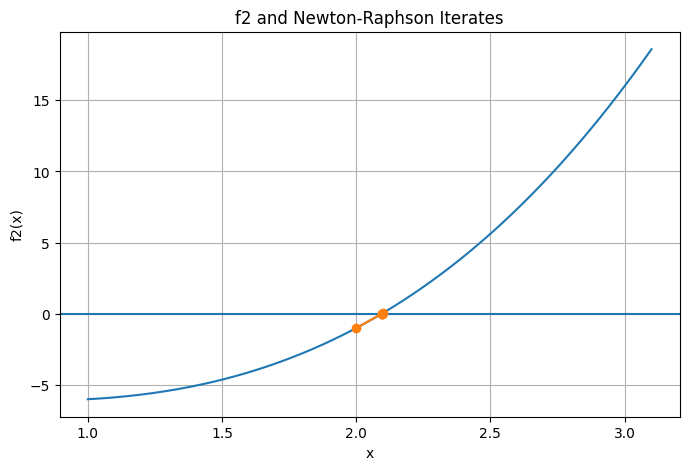

Root for f3 ~ 0.7390851332151607


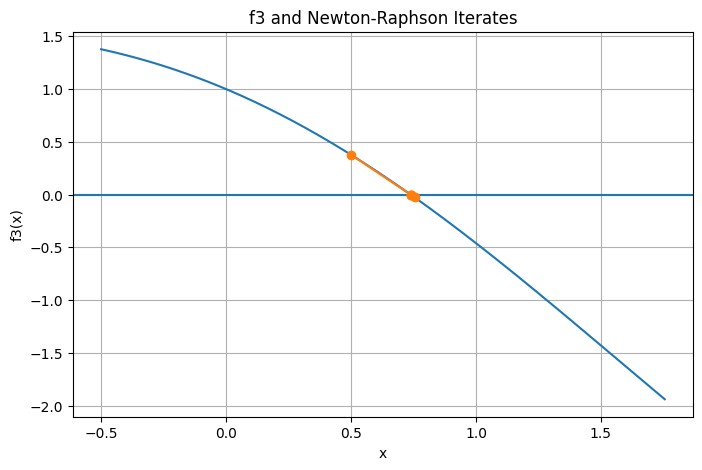

In [6]:
# Try with f2
x0 = 2.0
root2, xs2 = newton_raphson(f2, df2, x0=x0, tol=1e-10, max_iter=50)
print('Root for f2 ~', root2)

xs2_array = np.array(xs2)
x_min = np.min(xs2_array) - 1.0
x_max = np.max(xs2_array) + 1.0
X = np.linspace(x_min, x_max, 400)
Y = f2(X)
plt.figure(figsize=(8, 5))
plt.axhline(0.0)
plt.plot(X, Y)
plt.plot(xs2_array, f2(xs2_array), marker='o')
plt.title('f2 and Newton-Raphson Iterates')
plt.xlabel('x')
plt.ylabel('f2(x)')
plt.grid(True)
plt.show()

# Try with f3
x0 = 0.5
root3, xs3 = newton_raphson(f3, df3, x0=x0, tol=1e-10, max_iter=50)
print('Root for f3 ~', root3)

xs3_array = np.array(xs3)
x_min = np.min(xs3_array) - 1.0
x_max = np.max(xs3_array) + 1.0
X = np.linspace(x_min, x_max, 400)
Y = f3(X)
plt.figure(figsize=(8, 5))
plt.axhline(0.0)
plt.plot(X, Y)
plt.plot(xs3_array, f3(xs3_array), marker='o')
plt.title('f3 and Newton-Raphson Iterates')
plt.xlabel('x')
plt.ylabel('f3(x)')
plt.grid(True)
plt.show()

## Perguntas para reflexão
1. O que acontece quando a derivada $f'(x_k)$ é muito pequena ou nula? Como isso afeta a iteração?
2. Como a escolha do chute inicial influencia a convergência? Mostre um exemplo de divergência ou de convergência para uma raiz diferente.
3. Compare o comportamento do método nas três funções: rapidez de convergência, número de iterações e sensibilidade ao chute inicial.
4. Em que situações você preferiria outro método (bisseção, secante)? Justifique.

## Dicas finais
- Verifique sempre `|f(x_k)|` e `|x_{k+1}-x_k|`.
- Teste múltiplos chutes iniciais.
- Documente claramente os resultados e explique os casos em que o método falhar.